In [1]:
import sys, os, glob, warnings, logging
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sw_plotting import change_bar_width, plotCountBar
from sw_utilities import tukeyTest, getCountDFbyPrefix

# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)
logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.ERROR)

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# Make a folder if it is not already there to store exported figures
!mkdir ../jupyter_figures


mkdir: ../jupyter_figures: File exists


In [3]:
# Read in the count data by Kaz

datasetPrefix = '20220530-plate-i-day4-ph-z-endpoint'
datasetFolder = '../data/220509-30-for-bud-count-Kaz/count-all-planes/'
df = getCountDFbyPrefix(datasetPrefix, datasetFolder)

Summary of test:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2  meandiff p-adj   lower    upper  reject
------------------------------------------------------------
sg-Control sg1-Itgb1     -9.2 0.0157 -16.8348 -1.5652   True
sg-Control sg2-Itgb1    -11.6 0.0025 -19.2348 -3.9652   True
sg-Control sg3-Itgb1     -9.8   0.01 -17.4348 -2.1652   True
 sg1-Itgb1 sg2-Itgb1     -2.4 0.7858 -10.0348  5.2348  False
 sg1-Itgb1 sg3-Itgb1     -0.6    0.9  -8.2348  7.0348  False
 sg2-Itgb1 sg3-Itgb1      1.8    0.9  -5.8348  9.4348  False
------------------------------------------------------------
p values of all pair-wise tests:
 [0.01572119 0.00253016 0.00997651 0.78578634 0.9        0.9       ]


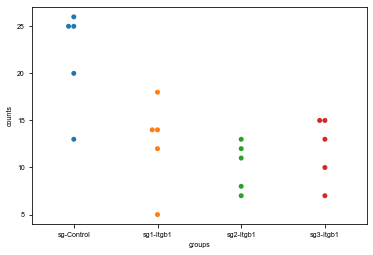

In [4]:
# - For Itgb1 KO, plates i set up on 5/26/22
# - Plate i
## - D2-D6, LV-188
## - D7-D11, LV-401
## - E2-E6, LV-402
## - E7-E11, LV-403

groups = ["sg-Control"]*5 + ["sg1-Itgb1"]*5 + ["sg2-Itgb1"]*5 + ["sg3-Itgb1"]*5
df["groups"] = groups

# Inspect raw data if curious about how they look
ax = sns.swarmplot(df.groups, df.counts)
# ax.set_ylim([0,50])

# Perform a Tukey test across groups
tukeyTest(df.counts, df.groups)

# Use different variables to hold counting data by Kaz or Rei
df_Kaz = df

In [5]:
# Read in the count data by Rei

datasetPrefix = '20220530-plate-i-day4-ph-z-endpoint'
datasetFolder = '../data/220509-30-for-bud-count-Rei/count-all-planes/'
df = getCountDFbyPrefix(datasetPrefix, datasetFolder)


Summary of test:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2  meandiff p-adj   lower    upper  reject
------------------------------------------------------------
sg-Control sg1-Itgb1     -7.2 0.1472 -16.2797  1.8797  False
sg-Control sg2-Itgb1    -11.6 0.0103 -20.6797 -2.5203   True
sg-Control sg3-Itgb1    -10.8 0.0172 -19.8797 -1.7203   True
 sg1-Itgb1 sg2-Itgb1     -4.4 0.5232 -13.4797  4.6797  False
 sg1-Itgb1 sg3-Itgb1     -3.6 0.6591 -12.6797  5.4797  False
 sg2-Itgb1 sg3-Itgb1      0.8    0.9  -8.2797  9.8797  False
------------------------------------------------------------
p values of all pair-wise tests:
 [0.14724008 0.01033211 0.01719212 0.52324742 0.65911974 0.9       ]


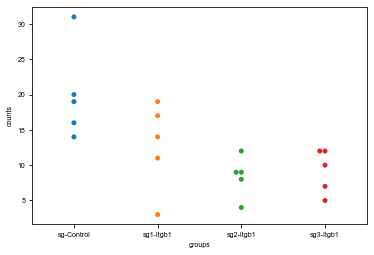

In [6]:
# - For Itgb1 KO, plates i set up on 5/26/22
# - Plate i
## - D2-D6, LV-188
## - D7-D11, LV-401
## - E2-E6, LV-402
## - E7-E11, LV-403

groups = ["sg-Control"]*5 + ["sg1-Itgb1"]*5 + ["sg2-Itgb1"]*5 + ["sg3-Itgb1"]*5
df["groups"] = groups

# Inspect raw data if curious about how they look
ax = sns.swarmplot(df.groups, df.counts)
# ax.set_ylim([0,50])

# Perform a Tukey test across groups
tukeyTest(df.counts, df.groups)

# Use different variables to hold counting data by Kaz or Rei
df_Rei = df

In [7]:
# Merge the two data set and compare the countings of Rei and Kaz
df_Kaz.rename(columns={'counts': 'counts_Kaz'}, inplace=True)
df_Rei.rename(columns={'counts': 'counts_Rei'}, inplace=True)
df = df_Kaz.merge(df_Rei, on=['file_name', 'scrambled_file_name', 'groups'])
df.head()

,file_name,scrambled_file_name,counts_Kaz,groups,counts_Rei
0,Plate07152021_WellD02_ChannelMono_Seq0000-reta...,52cb8992486bc3e11910ba1b2c18a5fc.nd2,25,sg-Control,31
1,Plate07152021_WellD03_ChannelMono_Seq0001.nd2,5a893865076ef87475dffc85634777ca.nd2,13,sg-Control,16
2,Plate07152021_WellD04_ChannelMono_Seq0000-reta...,02f37e5e19b113057f27bc7a92883f87.nd2,26,sg-Control,19
3,Plate07152021_WellD05_ChannelMono_Seq0003.nd2,791bc431f12678cb46fa404fbe07f72b.nd2,25,sg-Control,20
4,Plate07152021_WellD06_ChannelMono_Seq0004.nd2,3e220e8f458f2ae9d8c8e793a7bf9bca.nd2,20,sg-Control,14


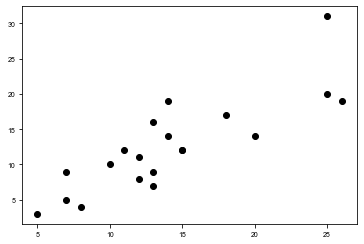

In [8]:
plt.plot(df.counts_Kaz, df.counts_Rei, 'ok')

In [9]:
df['counts'] = (df['counts_Rei'] + df['counts_Kaz']) / 2

Summary of test:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2  meandiff p-adj   lower    upper  reject
------------------------------------------------------------
sg-Control sg1-Itgb1     -8.2 0.0341 -15.8709 -0.5291   True
sg-Control sg2-Itgb1    -11.6 0.0026 -19.2709 -3.9291   True
sg-Control sg3-Itgb1    -10.3 0.0071 -17.9709 -2.6291   True
 sg1-Itgb1 sg2-Itgb1     -3.4  0.587 -11.0709  4.2709  False
 sg1-Itgb1 sg3-Itgb1     -2.1 0.8484  -9.7709  5.5709  False
 sg2-Itgb1 sg3-Itgb1      1.3    0.9  -6.3709  8.9709  False
------------------------------------------------------------
p values of all pair-wise tests:
 [0.03410873 0.00263857 0.00707177 0.58703271 0.84838166 0.9       ]


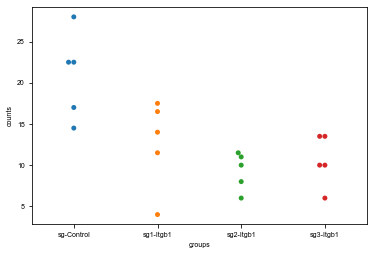

In [11]:
# Inspect raw data
ax = sns.swarmplot(df.groups, df.counts)

# Perform a Tukey test across groups
tukeyTest(df.counts, df.groups)

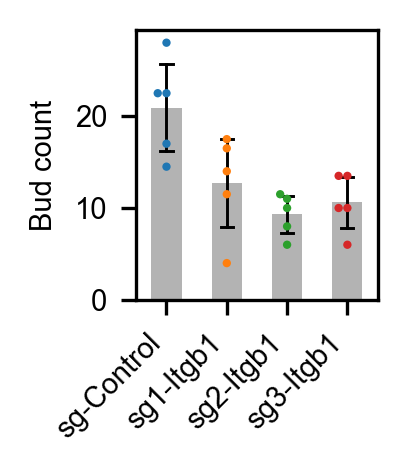

In [12]:
# Make plot for figure

fig_width, fig_height = 1.2, 1.5 # inches
line_width = .8
output_prefix = '220530-plate-i-day4-Itgb1'
outputFigPath = '../jupyter_figures/' + output_prefix + '.svg'
# outputFigPath = '../jupyter_figures/' + output_prefix + '.tif'

fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.28, 0.35, 0.67, 0.6])

# palette_dict = {'sg-Control': 'black', 'sg1-Itgb1': 'blue', 'sg2-Itgb1': 'red'}

sns.swarmplot(data = df,
              x = 'groups', y = 'counts',
              size = 2
             )
sns.barplot(data = df,
            x = 'groups', y = 'counts',
            ci = 'sd',
            color=".7", # This a nicer looking lighter gray to my own taste
            errwidth=.7, errcolor="k", capsize=.2)

change_bar_width(ax, .5)

# rotate x tick labels if necessary
x_labels = ax.get_xticklabels()
ax.set_xticklabels(labels=x_labels, rotation=45, ha="right")

plt.xlabel("")
plt.ylabel("Bud count")

# ax.get_legend().remove()

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

plt.savefig(outputFigPath)